In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
col_names=['buying','maint','doors','persons','lug boot','safety','class']

In [ ]:
df.columns=col_names
df.head()

,buying,maint,doors,persons,lug boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
df['doors'].value_counts()

5more    432
4        432
3        432
2        431
Name: doors, dtype: int64

In [ ]:
df['safety'].value_counts()

high    576
med     576
low     575
Name: safety, dtype: int64

In [ ]:
# converitng the output in predction form
df['class']=df['class'].replace({'unacc':0,'acc':1,'good':2,'vgood':3})

In [ ]:
# Have to do one-hot encoding for corr/heatmap  or calculations
df_copy=pd.get_dummies(df)

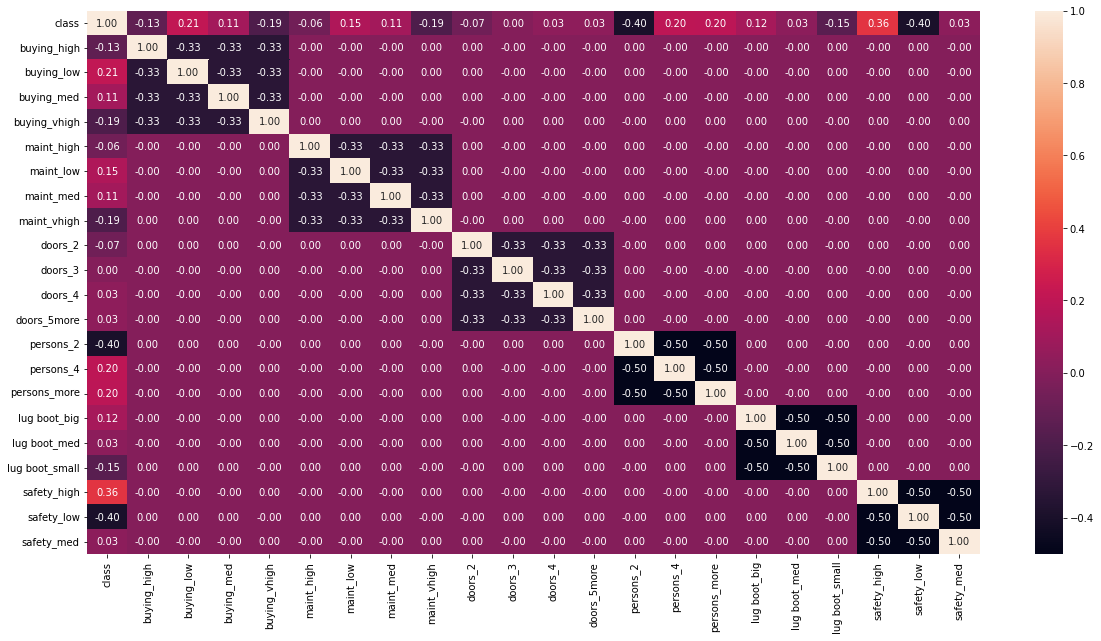

In [ ]:
plt.figure(figsize=(20,10))

sns.heatmap(df_copy.corr(),annot=True,fmt='0.2f')
# see one-class variable

In [ ]:
y=df['class']
x=df.drop(['class'],axis=1)

In [ ]:
# converting x to float for fit
x=pd.get_dummies(x)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [ ]:
# importing Decision tree
from sklearn.tree import DecisionTreeClassifier as tree


In [ ]:
ctree=tree()

In [ ]:
ctree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn import tree

[Text(779.4393203883495, 524.1857142857143, 'X[19] <= 0.5\ngini = 0.457\nsamples = 1727\nvalue = [1209, 384, 69, 65]'),
 Text(768.6043689320388, 485.3571428571429, 'X[12] <= 0.5\ngini = 0.579\nsamples = 1152\nvalue = [634, 384, 69, 65]'),
 Text(757.7694174757282, 446.52857142857147, 'X[7] <= 0.5\ngini = 0.629\nsamples = 768\nvalue = [250, 384, 69, 65]'),
 Text(518.7233009708738, 407.70000000000005, 'X[1] <= 0.5\ngini = 0.629\nsamples = 576\nvalue = [130, 312, 69, 65]'),
 Text(314.2135922330097, 368.8714285714286, 'X[17] <= 0.5\ngini = 0.552\nsamples = 432\nvalue = [124, 259, 23, 26]'),
 Text(157.10679611650485, 330.0428571428572, 'X[2] <= 0.5\ngini = 0.495\nsamples = 288\nvalue = [50, 196, 16, 26]'),
 Text(65.00970873786409, 291.2142857142857, 'X[4] <= 0.5\ngini = 0.37\nsamples = 192\nvalue = [47, 145, 0, 0]'),
 Text(32.504854368932044, 252.3857142857143, 'X[16] <= 0.5\ngini = 0.17\nsamples = 128\nvalue = [12, 116, 0, 0]'),
 Text(21.66990291262136, 213.55714285714288, 'gini = 0.0\nsamp

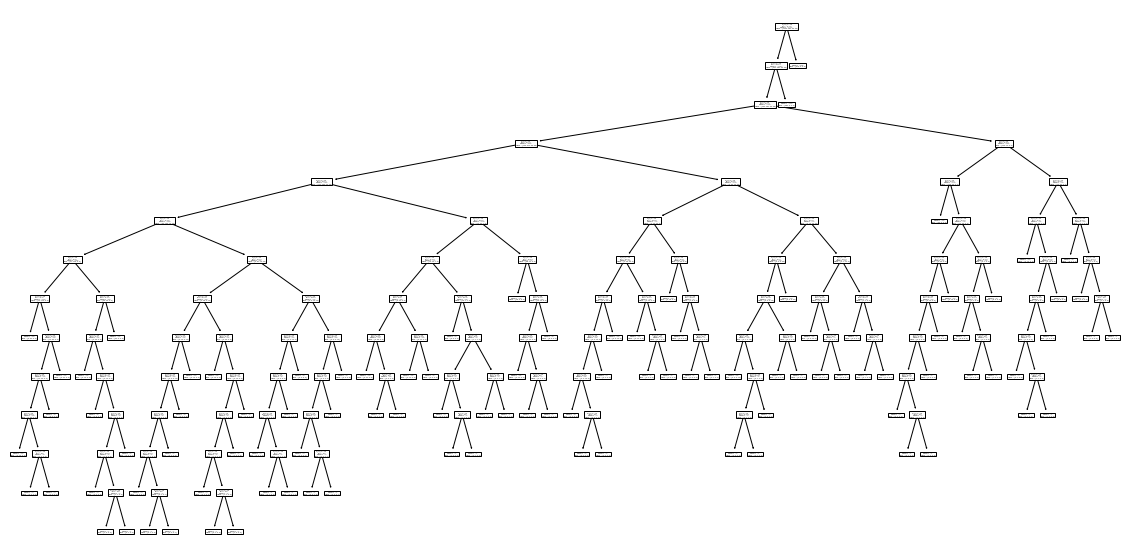

In [ ]:
# plotting tree
plt.figure(figsize=(20,10))

tree.plot_tree(ctree.fit(x,y))

In [ ]:
# Predictions
preds=ctree.predict(x_test)

In [ ]:
#Test- Accuracy
sum(preds==y_test)/len(preds)

0.9595375722543352

In [ ]:
# Training-Accuracy
preds=ctree.predict(x_train)
sum(preds==y_train)/len(preds)

1.0